In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

***
***
# T test - statistically different
$t_k = \dfrac{\bar x - \bar y}{\dfrac{s}{\sqrt n}}$
#### - used to test if two data sets are statistically different
- Uses two hypothesis that either the data is or is not different. It is not different until proven otherwise.
1. **Alternative Hypothesis $H_A$:** Suggests a significant difference between two groups.
2. **Null Hypothesis $H_0$ or $H_{Null}$:** Assumes no significant difference between groups.
3. **P-Value:** Probability value indicating evidence against the null hypothesis.
4. **Statistical Signifigance:** If the **p-value** is **below a certain threshold (commonly 0.05)**, the difference is *considered statistically significant*.
5. **T-Value:** The difference between means divided by the standard deviations, indicating the significance level between the groups.
    - a large t values is an indicator of the sets being statistically different

In [24]:
# example 1
# generating two sets of data to perform t test on

# number samples
n1 = 30
n2 = 40

# population means
mu_1 = 1
mu_2 = 1.2

# generating data sets
dataset_1 = mu_1+np.random.randn(n1)
dataset_2 = mu_2+np.random.randn(n2)

#### note: in the context of deep learning, the data sets will be outputs from two different models
- this will be used to assess if one model has actually improved, compared to the performance of another

## plotting the data sets

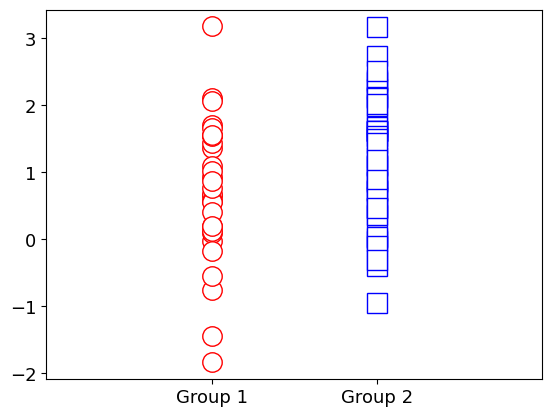

In [25]:
# example 1
# plotting datasets

plt.plot(np.zeros(n1), dataset_1, 'ro',markerfacecolor='w',markersize=14)
plt.plot(np.ones(n2), dataset_2, 'bs',markerfacecolor='w',markersize=14)

plt.xlim([-1,2])
plt.xticks([0,1], labels = ['Group 1', 'Group 2'])
plt.show()

## running the t test
- this involves using the function *ttest* from the stats submodule of the scipy library
- the specific function for these data sets is '*ttest_ind*', because independent data points were measured
- the output of this function will be a tuple of two values, stored in t and p

In [26]:
# example 1
# running t test

t,p = stats.ttest_ind(dataset_1, dataset_2)
print(t) # shows t value
print(p) # shows p value

-1.9150535352238052
0.05969282894010195


#### looking at the results:
- the negative *sign does not have much meaning*, just dependent on order of datasets
- the **t value has a fairly large** magnitude, which indicates that the data may be statistically different 
- the **p value is very small**, it is **far below a normal statistical threshold of 5%**. 
    - this means that the chances of these differences being randomness or sampling variance is *very small*
    - this also means that the data sets are significantly different

#### these data sets are statistically different

***
### alternate way of graphing data sets

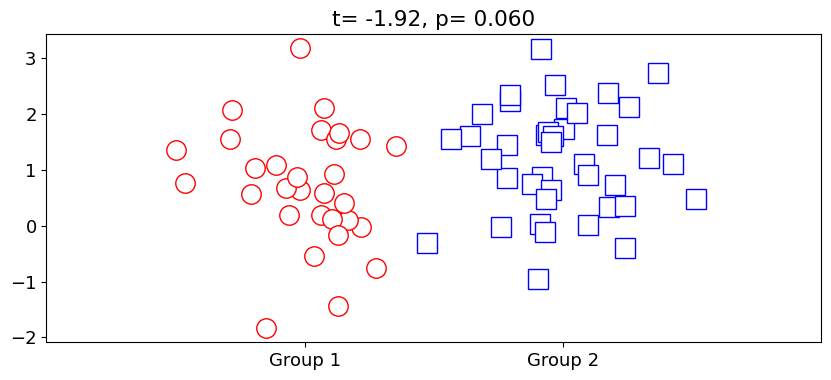

In [27]:
# example 1
# adding random x offset to data points in datasets

fig = plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size':13}) # changing font size

# added random offset for dataset 1, starting around 0
plt.plot(0+np.random.randn(n1)/5, dataset_1,'ro',markerfacecolor='w', markersize=14)

# added random offset for dataset2, starting around 1
plt.plot(1+np.random.randn(n2)/5, dataset_2,'bs',markerfacecolor='w', markersize=14)

plt.xlim([-1,2]) # changes limits of x axis
plt.xticks([0,1],labels=['Group 1', 'Group 2'])

# including t-value and p-value in title
plt.title(f't= {t:.2f}, p= {p:.3f}')

plt.show()



### General Trends
- these are trends that I noticed when experimenting with this code and changing one parameter:
1. More data points give more clear results. 
    - I tried changing the n1 parameter, and it greatly increased the size of t and decreased the size of p
    - this made it much more clear that the data sets were statistically different
2. Closer population means will usually indicate that there is not statistical difference.
    - This was used to generate new random datasets.
    - I changed the *value of mu_2 to be 1.2*, which is close to the value of *mu_1*, 1.
    - The result was the null hypothesis winning out, and the sets not being different.